<a href="https://colab.research.google.com/github/aritanaoya/howling_canceler/blob/master/noisy_canceller_with_DNCNN_naration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa==0.7

     |████████████████████████████████| 1.6MB 1.9MB/s 
  Created wheel for librosa: filename=librosa-0.7.0-cp36-none-any.whl size=1598345 sha256=836f9b8fdc6d09010a4a03e2fe4bb3cdc94a3cb23cb595679c4706249c7b73dd
  Stored in directory: /root/.cache/pip/wheels/49/1d/38/c8ad12fcad67569d8e730c3275be5e581bd589558484a0f881
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


##google driveとの連携

In [0]:
import os, shutil

os.getcwd()
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id = '1_f9QqOEv7CfDgN4jXGoQ-1Agpoah_lvu'  # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('ford8k.wav.zip')

In [0]:
id = '15VxI3-pufRTOpJI-EEaIfTIkRFc2RprA'  # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('b_01.wav.zip')

In [173]:
!unzip b_01.wav.zip
!ls
import librosa
import librosa.core as lc  
import numpy as np  
import scipy 
import IPython.display as ipd
import os
import matplotlib.pyplot as plt

import librosa.display

Archive:  b_01.wav.zip
  inflating: b_01.wav                
  inflating: __MACOSX/._b_01.wav     
440Hz.wav
adc.json
b_01.wav
b_01.wav.zip
ford8k.wav
ford8k.wav.zip
howling_canceller
howling_cancellersin_noise_canceller_win5rb_weights.01-0.01-0.02.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.01-0.01-0.03.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.01-0.18-0.17.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.02-0.01-0.03.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.02-0.03-0.07.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.03-0.01-0.02.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.03-0.01-0.03.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.03-0.01-0.08.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.04-0.01-0.03.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.04-0.01-0.07.hdf5
howling_cancellersin_noise_canceller_win5rb_weights.05-0.01-0.03.hdf5
howling_cancellersin_noise_canceller_win5rb_we

##音声を分割

In [0]:
import wave
import struct
import math
from scipy import fromstring, float32,int16

# 一応既に同じ名前のディレクトリがないか確認。
file = os.path.exists("naration")
print(file)

if file == False:
    #保存先のディレクトリの作成
    os.mkdir("naration")

def cut_wav(filename,time):  # WAVファイルを刈り奪る　形をしてるだろ？ 
    # timeの単位は[sec]

    # ファイルを読み出し
    wavf = filename + '.wav'
    wr = wave.open(wavf, 'r')

    # waveファイルが持つ性質を取得
    ch = wr.getnchannels()
    width = wr.getsampwidth()
    fr = wr.getframerate()
    fn = wr.getnframes()
    total_time = 1.0 * fn / fr
    integer = math.floor(total_time) # 小数点以下切り捨て
    t = int(time)  # 秒数[sec]
    frames = int(ch * fr * t)
    num_cut = int(integer//t)

    # waveの実データを取得し、数値化
    data = wr.readframes(wr.getnframes())
    wr.close()
    X = fromstring(data, dtype=int16)
    print(X)


    for i in range(num_cut):
        print(i)
        # 出力データを生成
        outf = 'naration/' + str(i) +'.wav'
        start_cut = i*frames
        end_cut = i*frames + frames
        print(start_cut)
        print(end_cut)
        Y = X[start_cut:end_cut]
        outd = struct.pack("h" * len(Y), *Y)

        # 書き出し
        ww = wave.open(outf, 'w')
        ww.setnchannels(ch)
        ww.setsampwidth(width)
        ww.setframerate(fr)
        ww.writeframes(outd)
        ww.close()

print("input filename = ")
f_name = input()
print("cut time = ")
cut_time = input()
cut_wav(f_name,cut_time)

In [176]:
!pwd
!ls /content/naration
#/content/ford8k

/content
0.wav	12.wav	15.wav	18.wav	20.wav	23.wav	3.wav  6.wav  9.wav
10.wav	13.wav	16.wav	19.wav	21.wav	24.wav	4.wav  7.wav
11.wav	14.wav	17.wav	1.wav	22.wav	2.wav	5.wav  8.wav


In [0]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import wave
import struct
import librosa.core as lc  
import scipy 
import IPython.display as ipd
import os
import librosa.display

In [180]:
import IPython.display as ipd
def load_sound_files(parent_dir, file_paths):
    raw_sounds = []
    
    for fp in file_paths:
        y,sr = librosa.load(parent_dir + fp, sr=8000,dtype='float32',duration=10)
        #デフォルトでモノラル化、
        raw_sounds.append(y)
    return raw_sounds
correct_sound_file_paths = ["0.wav","1.wav","2.wav","3.wav","4.wav","5.wav","6.wav","7.wav","8.wav","9.wav","10.wav","11.wav","12.wav","13.wav","14.wav",
                            "15.wav","16.wav","17.wav","18.wav","19.wav","20.wav","21.wav","22.wav","23.wav"]
                                                   
parent_dir = '/content/naration/'
correct_sounds=[]
correct_sounds =load_sound_files(parent_dir,correct_sound_file_paths)
print(correct_sounds[3].shape)
ipd.Audio(data=correct_sounds[3],rate=8000)

(16000,)


##sin波の生成

In [0]:

A=0.1#振幅
fs = 8000#サンプリング周波数
f0 = 440#基本周波数(今回はラ)
sec = 2 #秒

#sin波
#--------------------------------------------------------------------------------------------------------------------
def create_wave(A,f0,fs,t):#A:振幅,f0:基本周波数,fs:サンプリング周波数,再生時間[s]
    #nポイント
    #--------------------------------------------------------------------------------------------------------------------
    point = np.arange(0,fs*t)
    sin_wave =A* np.sin(2*np.pi*f0*point/fs)

    sin_wave = [int(x * 32767.0) for x in sin_wave]#16bit符号付き整数に変換

    #バイナリ化
    binwave = struct.pack("h" * len(sin_wave), *sin_wave)

    #サイン波をwavファイルとして書き出し
    w = wave.Wave_write("440Hz.wav")
    p = (1, 2, fs, len(binwave), 'NONE', 'not compressed')#(チャンネル数(1:モノラル,2:ステレオ)、サンプルサイズ(バイト)、サンプリング周波数、フレーム数、圧縮形式(今のところNONEのみ)、圧縮形式を人に判読可能な形にしたもの？通常、 'NONE' に対して 'not compressed' が返されます。)
    w.setparams(p)
    w.writeframes(binwave)
    w.close()
create_wave(A, f0, fs, sec) 

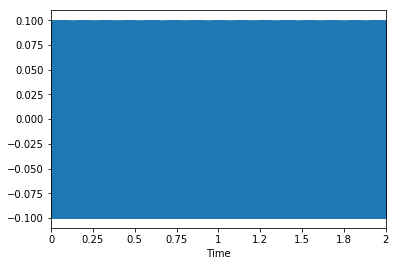

In [12]:
sin_file_paths=["440Hz.wav"]
parent_dir3 = '/content/'
sin=[]
sin= load_sound_files(parent_dir3,sin_file_paths)
librosa.display.waveplot(sin[0], 8000)
ipd.Audio(data=sin,rate=8000)

In [0]:
sin_sounds=[]
for i in range(len(correct_sound_file_paths)):
  sin_sounds.append(correct_sounds[i] + sin[0])

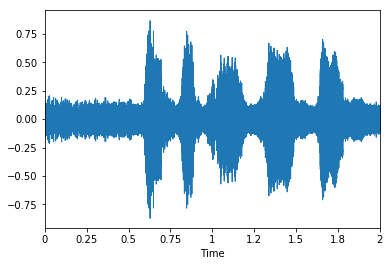

In [14]:
librosa.display.waveplot(sin_sounds[0], 8000)

ipd.Audio(data=sin_sounds[0],rate=8000)

##band_limited_noise生成


In [0]:
# from https://stackoverflow.com/questions/33933842/how-to-generate-noise-in-frequency-range-with-numpy
def fftnoise(f):
    f = np.array(f, dtype="complex")
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1 : Np + 1] *= phases
    f[-1 : -1 - Np : -1] = np.conj(f[1 : Np + 1])
    return np.fft.ifft(f).real


def band_limited_noise(min_freq, max_freq, samples, sr):
    freqs = np.abs(np.fft.fftfreq(samples, 1 / sr))
    f = np.zeros(samples)
    f[np.logical_and(freqs >= min_freq, freqs <= max_freq)] = 1
    return fftnoise(f)

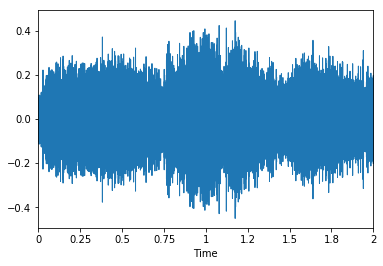

In [245]:
noise = band_limited_noise(min_freq= 2000, max_freq = 4000, samples=len(correct_sounds[0]), sr=8000)*10
band_limited_noise_sounds = []
for i in range(len(correct_sound_file_paths)):
  band_limited_noise_sounds.append(correct_sounds[i] + noise)

librosa.display.waveplot(band_limited_noise_sounds[0], 8000)

In [246]:
ipd.Audio(data=band_limited_noise_sounds[5], rate=8000)

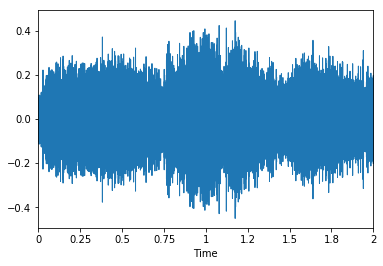

In [249]:
noise2 = band_limited_noise(min_freq= 500, max_freq = 2000, samples=len(correct_sounds[0]), sr=8000)*30
band_limited_noise_sounds2 = []
for i in range(len(correct_sound_file_paths)):
  band_limited_noise_sounds2.append(correct_sounds[i] + noise2)

librosa.display.waveplot(band_limited_noise_sounds[0], 8000)


In [250]:
ipd.Audio(data=band_limited_noise_sounds2[0], rate=8000)

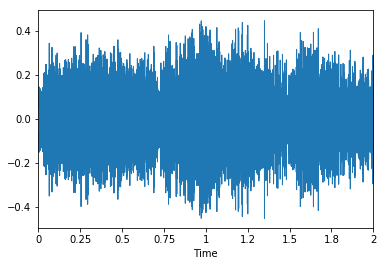

In [237]:
noise3 = band_limited_noise(min_freq= 0, max_freq = 500, samples=len(correct_sounds[0]), sr=8000)*30
band_limited_noise_sounds3 = []
for i in range(len(correct_sound_file_paths)):
  band_limited_noise_sounds3.append(correct_sounds[i] + noise3)

librosa.display.waveplot(band_limited_noise_sounds3[0], 8000)

In [238]:
ipd.Audio(data=band_limited_noise_sounds3[0], rate=8000)

##cal_power_spectrogram

In [251]:
# Get the power spectrogram
def cal_power_spectrogram(y):
  x=[]
  for i in  range(len(y)):
    x.append(np.abs(librosa.stft(y[i],n_fft = 1024,hop_length=256)))
  return x

train_files=[]
train_band_limided_noise_files =[]
train_band_limided_noise_files2 =[]
train_files = cal_power_spectrogram(correct_sounds)
print(train_files[0].shape)

train_band_limited_noise_files = cal_power_spectrogram(band_limited_noise_sounds)
train_band_limited_noise_files2 = cal_power_spectrogram(band_limited_noise_sounds2)
x = np.array(train_files)
train_files1 =np.log(x + 1e-10)
x1  = np.array(train_band_limited_noise_files)
train_band_limited_noise_files1 =np.log(x1+ 1e-10)
x2  = np.array(train_band_limited_noise_files2)
train_band_limited_noise_files2 =np.log(x2+ 1e-10)

(513, 63)


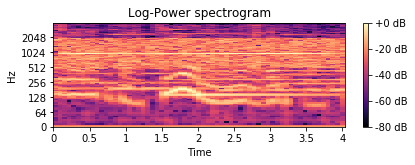

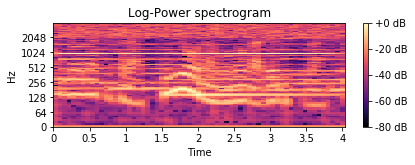

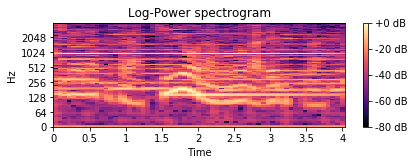

In [252]:
#音声プロット
#パワースペクトルと対数パワースペクトル

def plt_power_spec(S,sr):
  plt.figure()
  plt.subplot(2, 1, 2)
  #S1 = np.exp(S)
  librosa.display.specshow(librosa.power_to_db(S**2, ref=np.max),
                         sr=sr, y_axis='log', x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Log-Power spectrogram')
  plt.tight_layout()
  plt.show()
  
  
plt_power_spec(np.exp(train_band_limited_noise_files2[5]),8000)
plt_power_spec(np.exp(train_band_limited_noise_files1[5]),8000)
plt_power_spec(np.exp(train_files1[5]),8000)


(15872,)


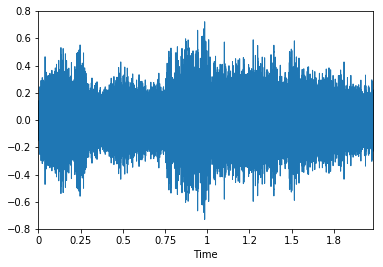

In [253]:
y0=np.exp(train_band_limited_noise_files1[5])
y1=lc.griffinlim(y0)
print(y1.shape)
librosa.display.waveplot(y1, 8000)
ipd.Audio(data=y1,rate=8000)


In [255]:
freq = 513
time = 63

train_num =24
test_num = 5

#型の変更
x_train = np.zeros(freq*time*train_num).reshape(train_num, freq, time)
x_train_band_limited_noise=np.zeros(freq*time*train_num).reshape(train_num, freq, time)
x_train_band_limited_noise2=np.zeros(freq*time*train_num).reshape(train_num, freq, time)

print(x_train.shape)
print(x_train_band_limited_noise.shape)

(24, 513, 63)
(24, 513, 63)


In [0]:
#print(train_noisy_files[0])
def min_max(x, axis=None):
    xmin = x.min(axis=axis, keepdims=True)
    xmax = x.max(axis=axis, keepdims=True)
    result = (x- xmin)/(xmax-xmin)

    return result, xmin ,xmax


#正規化
x_train , trainmin , trainmax = min_max(train_files1)
x_train_band_limited_noise, trainmin_noise, trainmax_noise = min_max(train_band_limited_noise_files1)
x_train_band_limited_noise2, trainmin_noise, trainmax_noise = min_max(train_band_limited_noise_files2)


In [263]:

# CNN用にデータを(batch_size, freq, time, 1)にreshape    
x_train_re=x_train.reshape(train_num, freq, time, 1)
x_train_band_limited_noise_re=x_train_band_limited_noise.reshape(train_num, freq, time, 1)
x_train_band_limited_noise_2re=x_train_band_limited_noise2.reshape(train_num, freq, time, 1)
print(x_train_re.shape)
print(x_train_band_limited_noise_re.shape)

(24, 513, 63, 1)
(24, 513, 63, 1)


In [0]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,Reshape,MaxPooling2D,UpSampling2D
from keras.layers import Conv2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Add
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers

# DNCNN
input_img = Input(shape=(513, 63, 1))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = Activation('relu')(x)

for i in range(15):
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

x = Conv2D(1, (3, 3), padding='same')(x)
output_img = Activation('tanh')(x)

# compile
model = Model(input_img, output_img)
model.compile(optimizer='adam', loss='mean_squared_error')


In [265]:
x_train1 = x_train_re[0:20,:,:,:]
x_train_band_limited_noise1 = x_train_band_limited_noise_re[0:20,:,:,:]
x_train_band_limited_noise2 = x_train_band_limited_noise_2re[0:20,:,:,:]
x_val = x_train_re[20:,:,:,:]
x_band_limited_noise_val =x_train_band_limited_noise_re[20:,:,:,:]
x_band_limited_noise_val2 =x_train_band_limited_noise_2re[20:,:,:,:]
print(x_val.shape)
print(x_band_limited_noise_val.shape)


(4, 513, 63, 1)
(4, 513, 63, 1)


In [0]:
model.summary()

In [0]:
batch_size = 1
epochs = 50
saveDir = "/content/howling_canceller"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)

def get_batch(x, y, batch_size, shuffle=False):
    '''ミニバッチを生成するジェネレーター関数
    '''
    num_samples = len(x)
    if shuffle:
        indices = np.random.permutation(num_samples)
    else:
        indices = np.random.arange(num_samples)
    num_iterations = np.ceil(num_samples / batch_size).astype(int)
    for itr in range(num_iterations):
        start = batch_size * itr
        excerpt = indices[start:start + batch_size]
        yield x[excerpt], y[excerpt]

In [283]:
"""
# options
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = saveDir + 'sin_noise_canceller_win5rb_weights.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, mode='auto')
"""
# train
for i in range(epochs):
  for x_batch, y_batch in get_batch(x_train_band_limited_noise1, x_train1, batch_size=1, shuffle=True):
    history = model.train_on_batch(x_batch, y_batch)
  test = model.evaluate(x_band_limited_noise_val,x_val)
  print("epoch:",i+1)
  print("test:",test)
  #for x_batch2, y_batch2 in get_batch(x_train_band_limited_noise2, x_train1, batch_size=1, shuffle=True):
    #history = model.train_on_batch(x_batch2, y_batch2)
  #test2 = model.evaluate(x_band_limited_noise_val2,x_val)
  #print("epoch:",i+1)
  #print("test:",test2)


4/4 [==============================] - 0s 32ms/step
epoch: 1
test: 0.010149512439966202
4/4 [==============================] - 0s 31ms/step
epoch: 2
test: 0.009631420485675335
4/4 [==============================] - 0s 32ms/step
epoch: 3
test: 0.01066783256828785
4/4 [==============================] - 0s 32ms/step
epoch: 4
test: 0.010654967278242111
4/4 [==============================] - 0s 31ms/step
epoch: 5
test: 0.01395859383046627
4/4 [==============================] - 0s 32ms/step
epoch: 6
test: 0.012173010036349297
4/4 [==============================] - 0s 32ms/step
epoch: 7
test: 0.010424943640828133
4/4 [==============================] - 0s 32ms/step
epoch: 8
test: 0.011889450252056122
4/4 [==============================] - 0s 31ms/step
epoch: 9
test: 0.013603707775473595
4/4 [==============================] - 0s 32ms/step
epoch: 10
test: 0.00851589534431696
4/4 [==============================] - 0s 33ms/step
epoch: 11
test: 0.0052599189803004265
4/4 [===========================

In [0]:
how_cancel=model.predict(x_band_limited_noise_val)
#how_cancel_reshape=how_cancel1.reshape(125,513,63*1)
#how_cancel_re=np.zeros(freq*time*test_num*len(how_cancel1)).reshape(test_num*len(how_cancel1), freq, time)
#for i in range(len(x_noisy_val)):
#  how_cancel_re[i*test_num:(i+1)*test_num] = how_cancel_reshape

In [0]:
how_cancel1 = np.exp(how_cancel * (trainmax - trainmin) + trainmin)

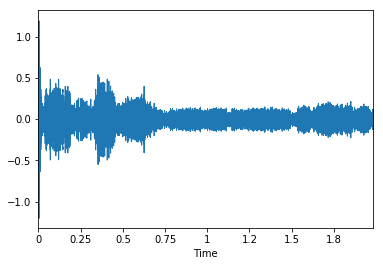

In [286]:
how_cancel_re= how_cancel1[0].reshape(513,63*1)
how_cancel_gri=lc.griffinlim(how_cancel_re)
librosa.display.waveplot(how_cancel_gri, sr=8000)
ipd.Audio(data=how_cancel_gri,rate=8000)

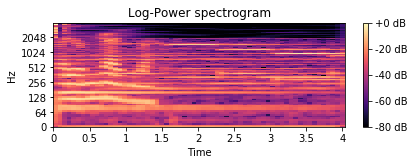

In [287]:
plt_power_spec(how_cancel_re,8000)

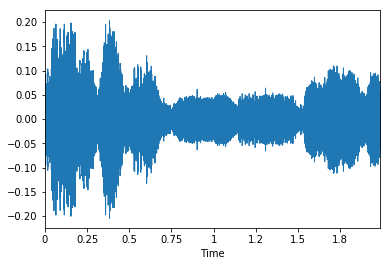

In [288]:
y0 = np.exp(x_band_limited_noise_val[0]*(trainmax_noise - trainmin_noise) + trainmin_noise)
y = y0.reshape(513,63*1)
y_gri=lc.griffinlim(y)
librosa.display.waveplot(y_gri, sr=8000)
ipd.Audio(data=y_gri,rate=8000)


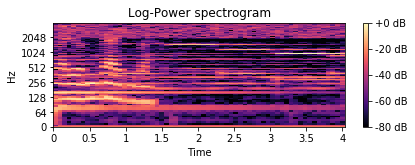

In [289]:
plt_power_spec(y,8000)

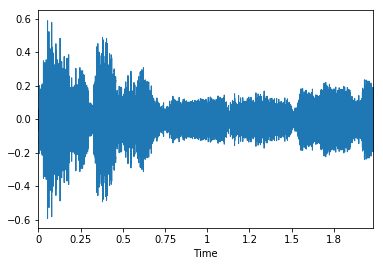

In [290]:
y01 = np.exp(x_val[0]*(trainmax_noise - trainmin_noise) + trainmin_noise)
y1 = y01.reshape(513,63*1)
y1_gri=lc.griffinlim(y1)
librosa.display.waveplot(y1_gri, sr=8000)
ipd.Audio(data=y1_gri,rate=8000)

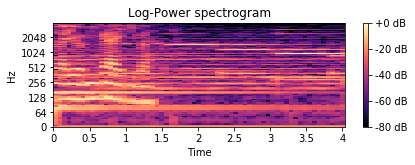

In [291]:
plt_power_spec(y1,8000)

In [63]:
score = model.evaluate(x_sinnoisy_val,x_val)
print('Test loss:', score)

NameError: ignored